In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/BTC-USD.csv", sep=',')

In [3]:
data = data[["Date", "High", "Low"]]

#worst case scenario, strating strategy on peak
data = data.loc[710:2215]


print(data.head())

#no missing data
#print(data.isnull().sum())

           Date          High           Low
710  2017-12-11  17513.900391  15404.799805
711  2017-12-12  17781.800781  16571.599609
712  2017-12-13  17653.099609  16039.700195
713  2017-12-14  17085.800781  16185.900391
714  2017-12-15  18154.099609  16601.300781


Minor function for setting BTC price graph on figures

In [4]:
def init(data):
    plt.figure(1)
    ax = plt.gca()
    data["BTC_Price_Scaled"] = data["Low"] / 10
    data.plot(x="Date", y="BTC_Price_Scaled",figsize=(30,10),color="black", ax = ax)

    plt.figure(2)
    ax = plt.gca()
    data.plot(x="Date", y="BTC_Price_Scaled",figsize=(30,10),color="black", ax = ax)

Functions for different crypto strategies:
First one is basic holding with moving average of 100 days.

In [5]:
def holding(data, starting_money):
    
    price = data.iloc[0].High
    numberOfBtc = starting_money / price
    data["HOLD_portfolio_value"] = data["High"] * numberOfBtc
    data["gain_percent"] = round(data["HOLD_portfolio_value"] / starting_money * 100 - 100, 2)
    data["HOLD_moving_average_100_days"] = data["HOLD_portfolio_value"].rolling(100).mean()

    print("Start HOLD {}$ on {}. End HOLD {}$ on {}. Total gain is {}%".format(starting_money, data.iloc[0].Date, round(data.iloc[-1].HOLD_portfolio_value, 2), data.iloc[-1].Date, data.iloc[-1].gain_percent))

    #ploting
    #figure 1 for portfolio value
    plt.figure(1)
    ax = plt.gca()
    data.plot(x="Date", y="HOLD_portfolio_value",figsize=(30,10), ax = ax)

    #figure 2 for moving average
    plt.figure(2)
    ax = plt.gca()
    data.plot(x="Date", y="HOLD_moving_average_100_days", figsize=(30,10), ax = ax)
    

In [6]:
def same_value_strategy(data, starting_money, percentSensitivity):
    #at the start, we will enter market with 50% of our money, that will be our same value
    price = data.iloc[0].High
    sameValue = (starting_money / 2)
    currentBtc = (starting_money / 2) / price
    currentMoney = (starting_money / 2)

    sensitivity = percentSensitivity / 100

    for index, row in data.iterrows():
        #buy
        if (row["Low"] * currentBtc < sameValue * (1-sensitivity) and currentMoney >= sameValue * sensitivity):
            currentMoney -= sameValue * sensitivity
            currentBtc += sameValue * sensitivity / row["Low"]
        elif(row["High"] * currentBtc > sameValue * (1+sensitivity)):
            currentMoney += sameValue * sensitivity
            currentBtc -= sameValue * sensitivity / row["High"]
            
        data.loc[index,"SAME_VALUE_portfolio_value"] = currentBtc * row["High"] + currentMoney

    finalPortfolio = round(data.iloc[-1].SAME_VALUE_portfolio_value, 2)

    print("Start SAME_VALUE {}$ on {}. End SAME_VALUE {}$ on {}. Total gain is {}%".format(starting_money, data.iloc[0].Date, finalPortfolio, data.iloc[-1].Date, round(finalPortfolio / starting_money * 100 - 100, 2)))

        
    data["SAME_VALUE_moving_average_100_days"] = data["SAME_VALUE_portfolio_value"].rolling(100).mean()
    #ploting

    #figure 1 for portfolio value
    plt.figure(1)
    ax = plt.gca()
    data.plot(x="Date", y="SAME_VALUE_portfolio_value",figsize=(30,10), ax = ax)

    #figure 2 for moving average
    plt.figure(2)
    ax = plt.gca()
    data.plot(x="Date", y="SAME_VALUE_moving_average_100_days", figsize=(30,10), ax = ax)


    

In [7]:
def dca_strategy(data, starting_money, buy_days, interval_between_days):
    dcaAmount = starting_money/buy_days
    currentBtc = 0
    currentMoney = starting_money

    i = 0
    for index, row in data.iterrows():
        if(i >= interval_between_days and currentMoney >= dcaAmount):
            currentMoney -= dcaAmount
            currentBtc += dcaAmount / row["Low"]
            i = 0
        i+=1

        data.loc[index,"DCA_portfolio_value"] = currentBtc * row["High"] + currentMoney
    
    finalPortfolio = round(data.iloc[-1].DCA_portfolio_value, 2)

    print("Start DCA {}$ on {}. End DCA {}$ on {}. Total gain is {}%".format(starting_money, data.iloc[0].Date, finalPortfolio, data.iloc[-1].Date, round(finalPortfolio / starting_money * 100 - 100, 2)))

    data["DCA_moving_average_100_days"] = data["DCA_portfolio_value"].rolling(100).mean()
    #ploting

    #figure 1 for portfolio value
    plt.figure(1)
    ax = plt.gca()
    data.plot(x="Date", y="DCA_portfolio_value",figsize=(30,10), ax = ax)

    #figure 2 for moving average
    plt.figure(2)
    ax = plt.gca()
    data.plot(x="Date", y="DCA_moving_average_100_days", figsize=(30,10), ax = ax)

Calling of all functions to easily compare them

Start HOLD 1000$ on 2017-12-11. End HOLD 2064.82$ on 2022-01-24. Total gain is 106.48%
Start SAME_VALUE 1000$ on 2017-12-11. End SAME_VALUE 2398.91$ on 2022-01-24. Total gain is 139.89%
Start DCA 1000$ on 2017-12-11. End DCA 6201.72$ on 2022-01-24. Total gain is 520.17%


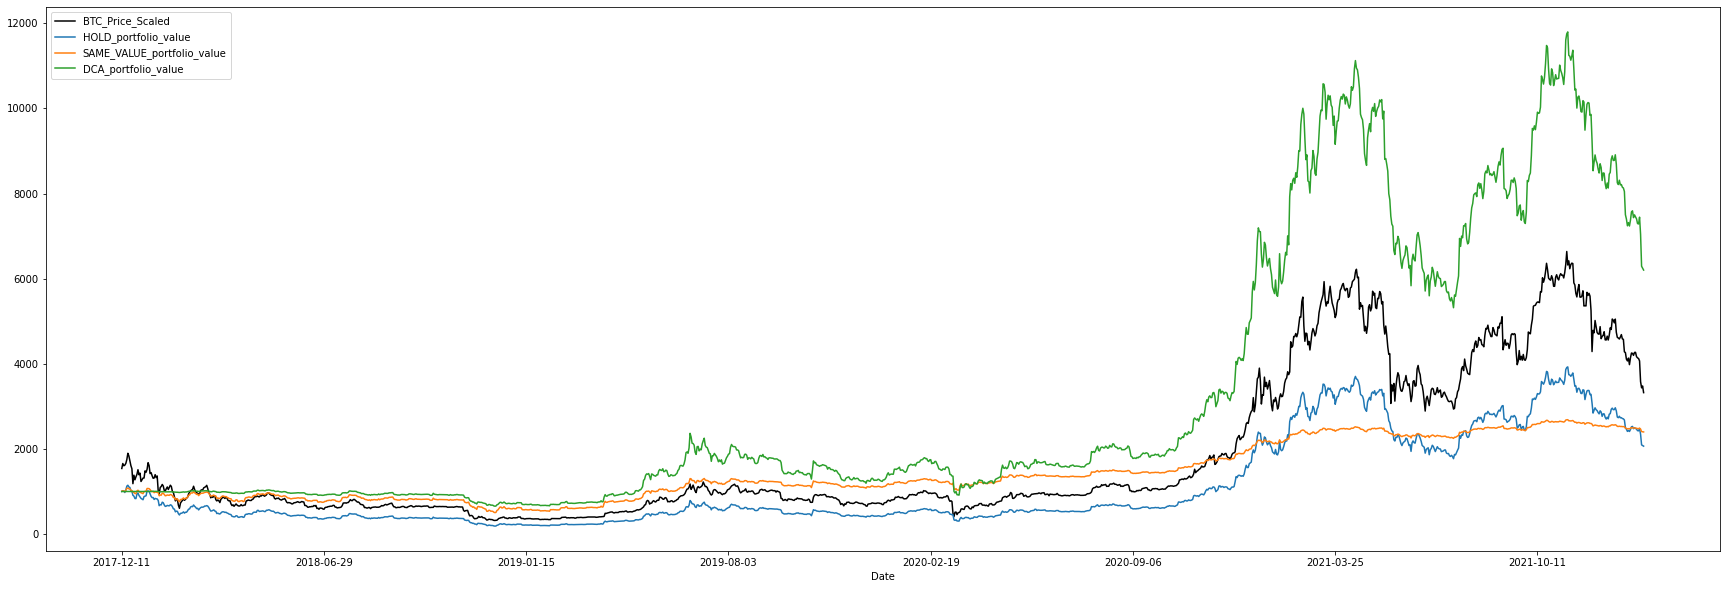

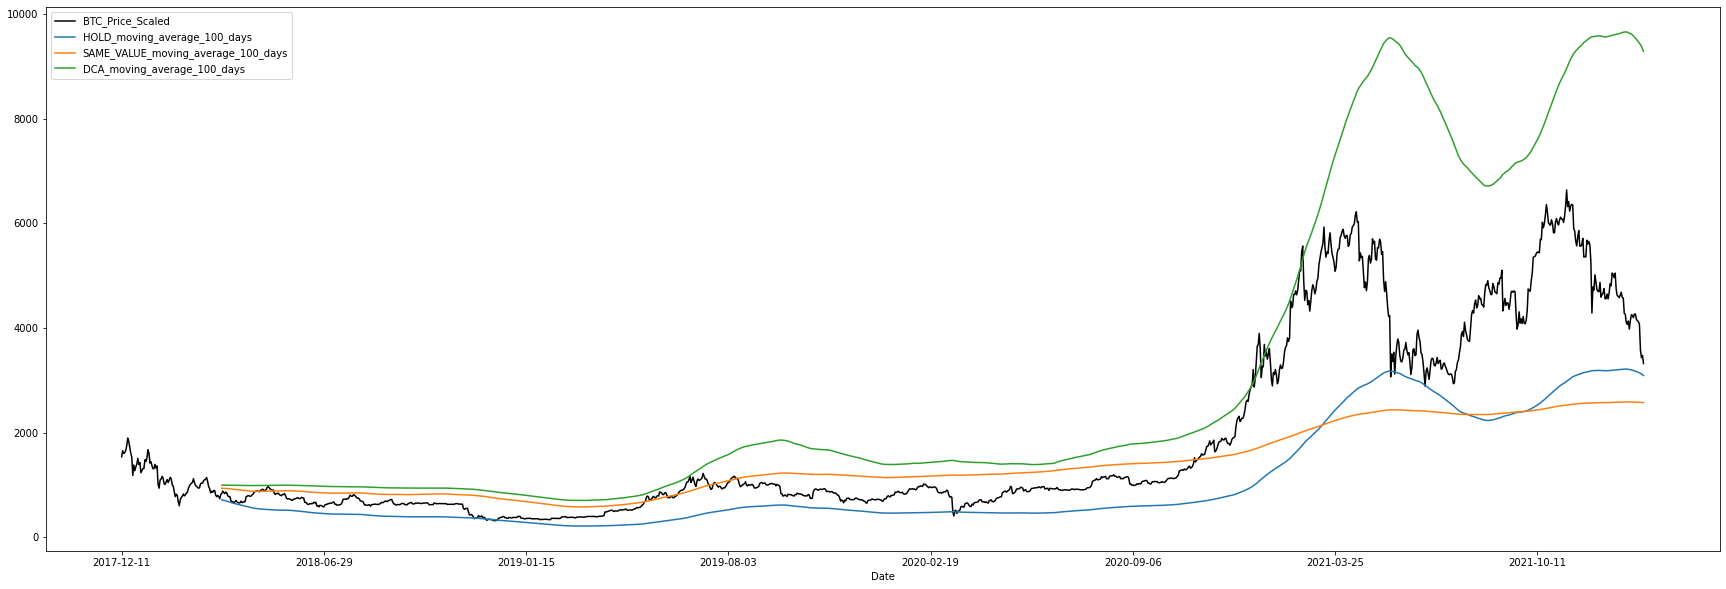

In [9]:
init(data)

holding(data, 1000)
same_value_strategy(data, 1000, 10)
dca_strategy(data, 1000, 18, 30)

plt.show()